In [19]:
import os
from collections import defaultdict
from os.path import join as pjoin
import numpy as np

from motionx_explorer import motion_arr_to_dict, names_to_arrays, calc_mean_stddev_pose, get_info_from_file, label_code

In [2]:
data_dir = "../data/GRAB/"
emotions_dir = pjoin(data_dir, "face_texts")
motion_label_dir = pjoin(data_dir, "texts")
print(f"data dir: {data_dir}")
print(f"emotions_dir: {emotions_dir}")
print(f"motion_label_dir: {motion_label_dir}")
print(f"cwd {os.getcwd()}")

data dir: ../data/GRAB/
emotions_dir: ../data/GRAB/face_texts
motion_label_dir: ../data/GRAB/texts
cwd /work3/s222376/MotionDiffuse2/text2motion/datasets


In [3]:
def get_seq_type(file_name):
    seq_type_path = pjoin(motion_label_dir, f"{file_name}.txt")
    with open(seq_type_path, 'r') as f:
        seq_type = f.readline().strip()
    return seq_type

In [4]:
file = pjoin(data_dir, "train.txt")
info = get_info_from_file(file, emotions_label_dir=emotions_dir, motion_label_dir=motion_label_dir)

In [5]:
seq_type_to_emotions = info["seq_type_to_emotions"]
n_types = len(seq_type_to_emotions.keys())
# print results, sorted alphabetically by seq_type
sorted_seq_types = sorted(seq_type_to_emotions.keys())
for seq_type in sorted_seq_types:
    emotions = seq_type_to_emotions[seq_type]
    print(f"{seq_type}: {emotions}")
print(f"n_types: {n_types}")
print(f"total sequences {info['n_seq']}")

airplane fly: {'thinking', 'happiness', 'anger', 'fear', 'neutral'}
airplane lift: {'fear', 'unsure', 'bothered', 'surprise'}
airplane lift Retake: {'thinking'}
airplane offhand: {'thinking', 'anger'}
airplane pass: {'sadness', 'disgust', 'happiness', 'anger', 'fear'}
alarmclock lift: {'fear', 'thinking', 'sadness', 'neutral'}
alarmclock lift Retake: {'intrest'}
alarmclock offhand: {'neutral', 'disgust'}
alarmclock pass: {'fear', 'unsure', 'thinking', 'neutral'}
alarmclock see: {'sadness', 'bothered', 'intrest', 'unsure', 'happiness', 'anger'}
apple eat: {'fear', 'unsure', 'anger', 'neutral'}
apple lift: {'thinking', 'concentrating', 'bothered', 'unsure', 'happiness'}
apple offhand: {'sadness'}
apple offhand Retake: {'bothered'}
apple pass: {'sadness', 'bothered', 'unsure', 'fear', 'neutral', 'surprise'}
banana eat: {'unsure', 'thinking', 'concentrating', 'happiness'}
banana lift: {'happiness', 'bothered', 'disgust'}
banana pass: {'sadness', 'disgust', 'unsure', 'contempt', 'neutral'}


In [8]:
emotions_count = info["emotions_count"]
sorted_emos = sorted(emotions_count.keys())
code_to_label = info["code_to_label"]
for emo in sorted_emos:
    print(f"{code_to_label[emo]}: {emotions_count[emo]}")

anger: 83
boredom: 42
bothered: 59
concentrating: 59
disgust: 83
fear: 51
happiness: 140
intrest: 21
neutral: 153
sadness: 131
surprise: 26
thinking: 90
unsure: 130


In [9]:
seq_type_count = info["seq_type_count"]
sorted_motions = sorted(seq_type_count.keys())
for motion in sorted_motions:
    print(f"{motion}: {seq_type_count[motion]}")

airplane fly: 7
airplane lift: 5
airplane lift Retake: 1
airplane offhand: 2
airplane pass: 6
alarmclock lift: 7
alarmclock lift Retake: 1
alarmclock offhand: 2
alarmclock pass: 4
alarmclock see: 8
apple eat: 7
apple lift: 8
apple offhand: 1
apple offhand Retake: 1
apple pass: 9
banana eat: 6
banana lift: 3
banana pass: 6
banana peel: 11
binoculars lift: 4
binoculars offhand: 1
binoculars pass: 5
binoculars see: 7
bowl drink: 12
bowl drink Retake: 2
bowl lift: 5
bowl offhand: 1
bowl pass: 6
camera browse: 7
camera lift: 2
camera offhand: 2
camera pass: 9
camera takepicture: 16
camera takepicture Retake: 1
cubelarge inspect: 7
cubelarge lift: 6
cubelarge offhand: 2
cubelarge pass: 8
cubemedium inspect: 7
cubemedium lift: 7
cubemedium offhand: 2
cubemedium pass: 8
cubesmall inspect: 7
cubesmall lift: 6
cubesmall offhand: 2
cubesmall pass: 5
cup drink: 12
cup lift: 5
cup offhand: 2
cup pass: 8
cup pour: 6
cylinderlarge inspect: 10
cylinderlarge lift: 8
cylinderlarge lift Retake: 1
cylinde

In [10]:
obj_count = info["obj_count"]
for object_ in sorted(obj_count.keys()):
    print(f"{code_to_label[object_]}: {obj_count[object_]}")

airplane: 21
alarmclock: 22
apple: 26
banana: 26
binoculars: 17
bowl: 26
camera: 37
cubesmall: 67
cup: 33
cylinderlarge: 66
doorknob: 16
duck: 18
elephant: 21
eyeglasses: 22
flashlight: 20
flute: 20
fryingpan: 17
gamecontroller: 20
hammer: 28
hand: 21
headphones: 18
knife: 10
lightbulb: 6
mouse: 22
mug: 33
phone: 20
piggybank: 24
pyramidlarge: 46
scissors: 9
spheremedium: 56
stanfordbunny: 74
teapot: 18
toothpaste: 28
toruslarge: 52
train: 19
waterbottle: 53
wineglass: 36


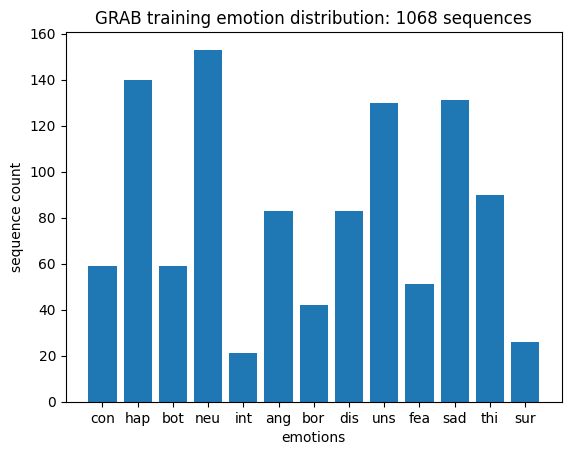

In [16]:
# show all as histogram
import matplotlib.pyplot as plt

plt.bar(range(len(emotions_count)), list(emotions_count.values()), align='center')
plt.xticks(range(len(emotions_count)), list(emotions_count.keys()))
# add title: GRAB training set emotion distribution
plt.title(f"GRAB training emotion distribution: {info['n_seq']} sequences")
# add axes
plt.xlabel("emotions")
plt.ylabel("sequence count")
plt.show()

Text(0, 0.5, 'sequence count')

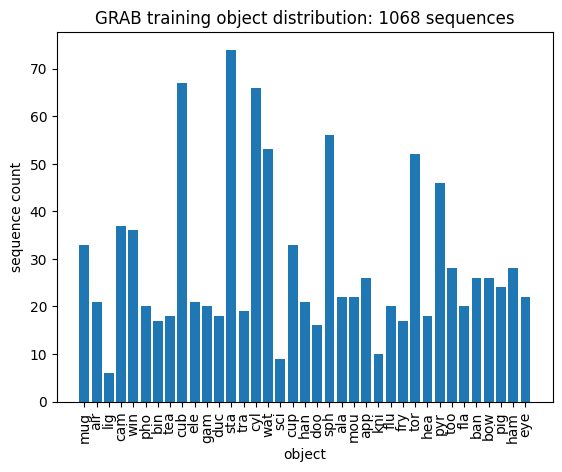

In [17]:
# grab training object distribution
plt.bar(range(len(obj_count)), list(obj_count.values()), align='center')
plt.xticks(range(len(obj_count)), list(obj_count.keys()))
plt.xticks(rotation=90)
# add title: GRAB training set object distribution
plt.title(f"GRAB training object distribution: {info['n_seq']} sequences")
tot_seqs = 0
for obj in obj_count.keys():
    tot_seqs += obj_count[obj]
plt.xlabel("object")
plt.ylabel("sequence count")

In [14]:
for obj in obj_count.keys():
    print(f"{obj} -> {code_to_label[obj]}")

mug -> mug
air -> airplane
lig -> lightbulb
cam -> camera
win -> wineglass
pho -> phone
bin -> binoculars
tea -> teapot
cub -> cubesmall
ele -> elephant
gam -> gamecontroller
duc -> duck
sta -> stanfordbunny
tra -> train
cyl -> cylinderlarge
wat -> waterbottle
sci -> scissors
cup -> cup
han -> hand
doo -> doorknob
sph -> spheremedium
ala -> alarmclock
mou -> mouse
app -> apple
kni -> knife
flu -> flute
fry -> fryingpan
tor -> toruslarge
hea -> headphones
pyr -> pyramidlarge
too -> toothpaste
fla -> flashlight
ban -> banana
bow -> bowl
pig -> piggybank
ham -> hammer
eye -> eyeglasses


In [15]:
seq_type = "airplane pass"
seq_emo_codes = [label_code(emo) for emo in seq_type_to_emotions[seq_type]]
print(f"emotions for {seq_type}: {seq_emo_codes}")
print(f"all emotions: {emotions_count.keys()}")
print(f"missing emotions: {set(emotions_count.keys()) - set(seq_emo_codes)}")

emotions for airplane pass: ['fea', 'dis', 'sad', 'hap', 'ang']
all emotions: dict_keys(['con', 'hap', 'bot', 'neu', 'int', 'ang', 'bor', 'dis', 'uns', 'fea', 'sad', 'thi', 'sur'])
missing emotions: {'int', 'sur', 'bot', 'thi', 'bor', 'con', 'neu', 'uns'}


In [21]:
emo = "surprise"
emo_code = label_code(emo)
emotion_to_names = info["emotion_to_names"]
names = emotion_to_names[emo_code]
print(f"seqs for emotion {code_to_label[emo_code]}")
for name in names:
    print(name)

seqs for emotion surprise
s2/cubesmall_lift
s2/stanfordbunny_lift
s1/flashlight_pass_1
s2/cubemedium_lift
s2/elephant_pass_1
s8/watch_lift
s1/stamp_pass_1
s7/cubesmall_pass_1
s9/apple_pass_1
s1/elephant_inspect_1
s7/hand_pass_1
s2/cylindermedium_lift
s1/hammer_pass_1
s6/phone_call_1
s4/bowl_pass_1
s1/phone_offhand_1
s5/gamecontroller_play_1
s5/apple_pass_1
s6/hammer_use_1
s9/toothbrush_pass_1
s8/hand_inspect_1
s1/headphones_pass_1
s9/spheresmall_inspect_1
s10/bowl_pass_1
s9/airplane_lift
s8/mug_offhand_1


In [22]:
arrays = names_to_arrays(data_dir, names)

In [23]:
print(f"calc stats for {len(arrays)} arrays")
mean, std = calc_mean_stddev_pose(arrays)
# add 1 dimension to mean and std
mean = mean.reshape(1, -1)
std = std.reshape(1, -1)

calc stats for 26 arrays


In [24]:
print(f"mean shape {mean.shape}")
print(f"std shape {std.shape}")

mean shape (1, 212)
std shape (1, 212)


In [25]:
mean_dict = motion_arr_to_dict(mean, shapes_dropped=True)
std_dict = motion_arr_to_dict(std, shapes_dropped=True)
print(f"surprise mean: {mean_dict['face_expr']}")
print(f"surprise std: {std_dict['face_expr']}")

surprise mean: tensor([[ 0.3944,  1.0355, -0.1104,  0.3438,  0.1835,  0.3515, -0.4112,  0.8183,
         -0.3203, -0.0656, -0.2213, -0.1106, -0.5442,  0.4136,  0.1552,  0.0691,
         -0.2591,  0.1572, -0.1857,  0.2525,  0.1290,  0.2594, -0.3789,  0.0457,
         -0.0049, -0.1438, -0.0413, -0.1620, -0.3905, -0.2516, -0.0828,  0.0523,
          0.4467, -0.4080,  0.1744, -0.1148, -0.2176,  0.0395,  0.1339,  0.3428,
          0.2916, -0.1423, -0.0314, -0.0233, -0.0612,  0.0477,  0.0232,  0.2205,
         -0.0019,  0.1335]])
surprise std: tensor([[0.7210, 0.7371, 0.3311, 0.4672, 0.9656, 0.7212, 0.9995, 0.8425, 0.6267,
         1.1531, 0.5747, 0.8608, 0.5243, 0.2150, 0.6206, 0.2514, 0.6583, 0.3428,
         0.5910, 0.1835, 0.2937, 0.5265, 0.7656, 0.4151, 0.3056, 0.2745, 0.1566,
         0.5495, 0.4626, 0.4047, 0.1767, 0.2355, 0.5954, 0.6374, 0.3063, 0.2315,
         0.3174, 0.1950, 0.2760, 0.6069, 0.4781, 0.3419, 0.1015, 0.1178, 0.1603,
         0.2853, 0.1881, 0.2943, 0.1791, 0.2315]])


In [26]:
# load std.npy from data dir
std_train = np.load(pjoin(data_dir, "Std.npy"))
std_train = std_train.reshape(1, -1)
mean_train = np.load(pjoin(data_dir, "Mean.npy"))
mean_train = mean_train.reshape(1, -1)
mean_train_dict = motion_arr_to_dict(mean_train, shapes_dropped=True)
std_train_dict = motion_arr_to_dict(std_train, shapes_dropped=True)
print(f"mean: {mean_train_dict['face_expr']}")
print(f"std: {std_train_dict['face_expr']}")

mean: tensor([[ 0.9793,  1.1955, -0.1761,  0.2503, -0.0148, -0.1734, -0.0857,  0.2882,
         -0.1658, -0.1143, -0.1749,  0.0256, -0.3031,  0.3240,  0.1928, -0.0123,
         -0.4032,  0.0880, -0.1201,  0.2633,  0.1121,  0.1342, -0.0902,  0.0071,
         -0.0969, -0.0379, -0.0360,  0.0097, -0.2914, -0.2203, -0.0764, -0.0385,
          0.3104, -0.2582,  0.1217, -0.1046, -0.0752,  0.0608,  0.0820,  0.2003,
          0.2053, -0.0535, -0.0106,  0.0088, -0.0766, -0.0099,  0.0547,  0.0924,
          0.0387,  0.1299]])
std: tensor([[1.0655, 1.0759, 0.4935, 0.4183, 0.7407, 0.6360, 0.9216, 0.6985, 0.6380,
         0.9843, 0.5477, 0.6577, 0.4538, 0.2694, 0.5082, 0.2214, 0.4444, 0.2400,
         0.4524, 0.1704, 0.2673, 0.3875, 0.5558, 0.3554, 0.2595, 0.2144, 0.1623,
         0.4468, 0.3424, 0.2883, 0.1587, 0.1878, 0.4116, 0.4483, 0.1814, 0.1800,
         0.2852, 0.1462, 0.2142, 0.4437, 0.3668, 0.2245, 0.1168, 0.1120, 0.1565,
         0.2382, 0.1440, 0.2470, 0.1249, 0.1625]])
